In [18]:
using Distributions, Gadfly

include("src/model.jl");
include("src/utils.jl");
include("src/mcmc.jl");
include("src/plotting.jl");

In [2]:
N = 100;
realmu = 10.0;
realphi = 2.0;
realxi = .3;

In [3]:
data = rand(GeneralizedExtremeValue(realmu, exp(realphi), realxi), N);

In [4]:
m = findMode(θ -> logposterior(θ, data), [0.0, 0.0, 0.0]);

In [5]:
s² = fisherVar(θ -> logposterior(θ, data), m);

In [22]:
approxMarginals = [
    Normal(m[1], sqrt(s²[1, 1])),
    Normal(m[2], sqrt(s²[2, 2])),
    Normal(m[3], sqrt(s²[3, 3])),    
];

In [16]:
niter = 100000;
δ = [5, .15, .3];
y0 = [0.0, 0.0, 0.0];

θ = mcmc(niter, δ, y0, data);

Taux d'acceptation (%) : [25.033250332503325, 23.473234732347322, 24.855248552485524]


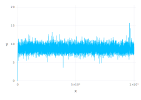

In [19]:
plot(x=1:niter, y=θ[1, :], Geom.line)

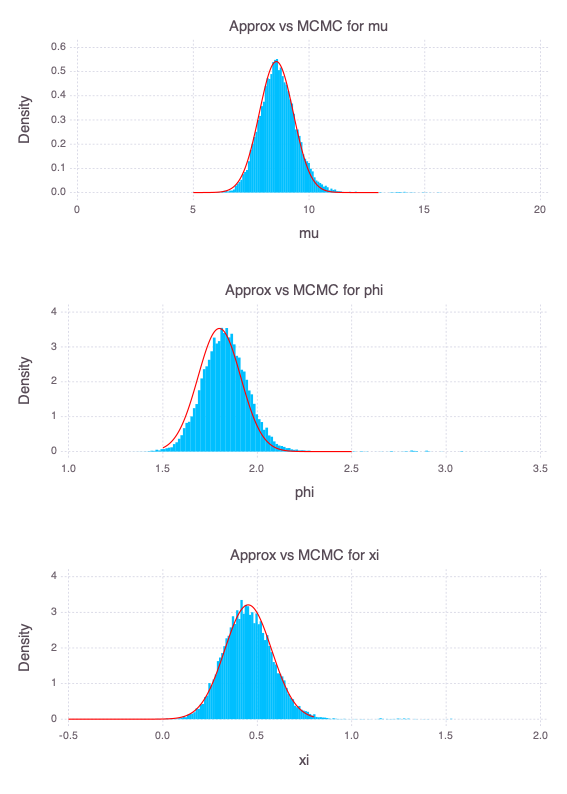

In [23]:
plotApproxVSMCMC(approxMarginals, θ, 1000)